In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
!ls ../datasets

city_attributes.csv     labor.csv               wind_direction.csv
crime.csv               pressure.csv            wind_speed.csv
crime_weekly.csv        temperature.csv
humidity.csv            weather_description.csv


In [27]:
crime = pd.read_csv('../datasets/crime.csv',parse_dates=['Dispatch_Date_Time'])


In [312]:
labor = pd.read_csv('../datasets/labor.csv')


In [28]:
crime

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 02:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 12:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 03:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 12:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140480,18,1,2016-02-29 10:48:00,2016-02-29,22:48:00,22,201618013054,5800 BLOCK CHRISTIAN ST,2600.0,All Other Offenses,14.0,2016-02,-75.239500,39.948906
2140481,25,2,2016-02-29 09:15:00,2016-02-29,09:15:00,9,201625016221,100 BLOCK W LUZERNE ST,1800.0,Narcotic / Drug Law Violations,18.0,2016-02,-75.130461,40.011360
2140482,26,3,2016-02-29 05:36:00,2016-02-29,17:36:00,17,201626010179,2300 BLOCK E YORK ST,600.0,Theft from Vehicle,19.0,2016-02,-75.124920,39.978297
2140483,22,1,2016-02-29 04:38:00,2016-02-29,16:38:00,16,201622016592,1500 BLOCK W OAKDALE ST,600.0,Theft from Vehicle,16.0,2016-02,-75.156388,39.993671


In [23]:
labor

,YEAR,MONTH,UNEMPLOYMENT,ELECTRICITY,UTILITY.GAS,GASOLINE
0,2006,Jan,39889,0.131,1.705,2.421
1,2006,Feb,39051,0.133,1.705,2.408
2,2006,Mar,37543,0.132,1.671,2.397
3,2006,Apr,35645,0.132,1.663,2.763
4,2006,May,37946,0.135,1.663,3.042
...,...,...,...,...,...,...
123,2016,Apr,46584,0.156,0.997,2.175
124,2016,May,49989,0.155,0.991,2.341
125,2016,Jun,49192,0.157,0.992,2.338
126,2016,Jul,55291,0.158,0.993,2.207


In [63]:
temp = pd.read_csv('../datasets/temperature.csv',parse_dates = ['datetime'])[['datetime','Philadelphia']]
temp = temp.rename(columns={'Philadelphia':'temperature'})
pressure = pd.read_csv('../datasets/pressure.csv',parse_dates = ['datetime'])[['datetime','Philadelphia']]
pressure = pressure.rename(columns={'Philadelphia':'pressure'})
humidity = pd.read_csv('../datasets/humidity.csv',parse_dates = ['datetime'])[['datetime','Philadelphia']]
humidity = humidity.rename(columns={'Philadelphia':'humidity'})


In [66]:
weather = temp.merge(pressure,on='datetime').merge(humidity,on='datetime')

In [371]:
weather_grouped = weather.groupby(pd.Grouper(key='datetime',freq='D')).median()

In [372]:
weather.to_csv('../datasets/weather_philly.csv',index=False)
weather_grouped.to_csv('../datasets/weather_philly_daily.csv',index=False)


## Need to turn Lat,Lon coords into neighborhoods in order to OHE them and sum over a set amount of time

In [185]:
import geopandas
df = geopandas.read_file('../datasets/Neighborhoods_Philadelphia.geojson')
df[df.mapname == 'Navy Yard'].geometry


153    MULTIPOLYGON (((-75.17343 39.89710, -75.17096 ...
Name: geometry, dtype: geometry

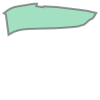

In [186]:
df[df.mapname == 'Navy Yard'].geometry.item()

In [187]:
crime.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 02:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 12:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 03:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 12:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [189]:
from shapely.geometry import Polygon, Point, MultiPolygon

In [232]:
lon,lat = crime.Lon[3],crime.Lat[3]

In [233]:
point = Point(lon,lat)

In [241]:
neighborhoods = []
for i in np.arange(len(crime)):
    lon,lat = crime.Lon[i],crime.Lat[i]
    
    if np.logical_or(np.isnan(lon),np.isnan(lat)):
        neighborhoods.append(np.nan)
    else:
        point = Point(lon,lat)
        try:
            neighborhoods.append(df[df.geometry.contains(point) == True].mapname.values[0])
        except:
            neighborhoods.append(np.nan)

In [254]:
neighborhoods[:10]

[nan,
 nan,
 nan,
 'Olney',
 'Francisville',
 'Graduate Hospital',
 'North Central',
 nan,
 nan,
 nan]

In [246]:
crime['neighborhoods'] = neighborhoods

In [252]:
crime_drop = crime.dropna()

In [253]:
crime_drop.to_csv('../datasets/crime_neighborhoods_nona.csv',index=False)

## Important columns in crime are 'Dispatch_Date_Time', 'Text_General_Code', 'Police_Districts' (maybe..) and neighborhoods.. maybe hour as well for grouping later

In [255]:
crime_drop = pd.read_csv('../datasets/crime_neighborhoods_nona.csv',parse_dates=['Dispatch_Date_Time'])
crime_cleaned = crime[['Dispatch_Date_Time','Hour','Text_General_Code','Police_Districts','neighborhoods']]
crime_cleaned['Hour'] = crime_cleaned['Hour'].astype('str')
crime_cleaned['Police_Districts'] = crime_cleaned['Police_Districts'].astype('str')


/Users/kessler.363/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kessler.363/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [256]:
ohecols = ['Hour','Text_General_Code','Police_Districts','neighborhoods']
one_hot = pd.get_dummies(crime_cleaned[ohecols])
crime_cleaned = crime_cleaned.drop(ohecols,axis=1)
crime_cleaned = crime_cleaned.join(one_hot)
crime_cleaned['num_crimes'] = 1

In [370]:
crime_grouped = crime_cleaned.groupby(pd.Grouper(key='Dispatch_Date_Time',freq='D')).sum()

In [373]:
mergecrime = crime_grouped.merge(weather_grouped,left_index=True, right_index=True)

In [374]:
mergecrime

,Hour_0,Hour_1,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,...,neighborhoods_Wissinoming,neighborhoods_Wister,neighborhoods_Woodland Terrace,neighborhoods_Wynnefield,neighborhoods_Wynnefield Heights,neighborhoods_Yorktown,num_crimes,temperature,pressure,humidity
2012-10-01,28.0,10.0,27.0,38.0,23.0,36.0,19.0,26.0,23.0,37.0,...,7.0,2.0,0.0,4.0,1.0,6.0,526,286.037673,1014.0,68.0
2012-10-02,16.0,11.0,41.0,25.0,23.0,27.0,32.0,23.0,40.0,29.0,...,12.0,1.0,0.0,2.0,3.0,1.0,566,287.675959,1014.0,59.5
2012-10-03,26.0,7.0,33.0,31.0,29.0,26.0,18.0,27.0,41.0,33.0,...,4.0,3.0,0.0,0.0,1.0,2.0,580,289.975000,1015.0,77.0
2012-10-04,37.0,21.0,22.0,25.0,35.0,22.0,20.0,27.0,47.0,37.0,...,11.0,3.0,0.0,5.0,2.0,3.0,631,291.965000,1017.0,94.0
2012-10-05,21.0,22.0,37.0,29.0,28.0,35.0,26.0,24.0,37.0,28.0,...,8.0,0.0,1.0,4.0,1.0,0.0,621,293.495000,1020.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-14,21.0,15.0,22.0,25.0,20.0,24.0,17.0,23.0,36.0,28.0,...,9.0,2.0,0.0,2.0,0.0,1.0,431,302.445000,1013.0,77.5
2016-08-15,22.0,13.0,21.0,35.0,33.0,20.0,13.0,26.0,35.0,36.0,...,8.0,1.0,0.0,5.0,2.0,1.0,517,298.740000,1019.5,75.5
2016-08-16,16.0,9.0,36.0,50.0,36.0,28.0,17.0,24.0,27.0,32.0,...,7.0,3.0,0.0,0.0,4.0,1.0,518,299.185000,1021.0,85.0
2016-08-17,19.0,14.0,26.0,25.0,23.0,30.0,18.0,20.0,26.0,30.0,...,7.0,4.0,0.0,1.0,3.0,1.0,465,299.805000,1016.0,78.5


In [400]:
mergecrime['year'] = mergecrime.index.year
mergecrime['month']= mergecrime.index.month

In [405]:
mergecrime.month

2012-10-01    10
2012-10-02    10
2012-10-03    10
2012-10-04    10
2012-10-05    10
              ..
2016-08-14     8
2016-08-15     8
2016-08-16     8
2016-08-17     8
2016-08-18     8
Freq: D, Name: month, Length: 1418, dtype: int64

In [442]:
merged_mega_crime = pd.merge(
    mergecrime,
    labor,
    left_on=['year','month'],
    right_on=['YEAR','month'])
merged_mega_crime
merged_mega_crime.to_csv('../datasets/merged_mega_crime.csv',index=False)

In [428]:
labor

,YEAR,MONTH,UNEMPLOYMENT,ELECTRICITY,UTILITY.GAS,GASOLINE,datetime
0,2006,Jan,39889,0.131,1.705,2.421,2006-01-01
1,2006,Feb,39051,0.133,1.705,2.408,2006-02-01
2,2006,Mar,37543,0.132,1.671,2.397,2006-03-01
3,2006,Apr,35645,0.132,1.663,2.763,2006-04-01
4,2006,May,37946,0.135,1.663,3.042,2006-05-01
...,...,...,...,...,...,...,...
123,2016,Apr,46584,0.156,0.997,2.175,2016-04-01
124,2016,May,49989,0.155,0.991,2.341,2016-05-01
125,2016,Jun,49192,0.157,0.992,2.338,2016-06-01
126,2016,Jul,55291,0.158,0.993,2.207,2016-07-01


In [435]:
import calendar
d = dict(zip(pd.date_range('2006-01-01', freq='M', periods=12).strftime('%b'),range(1,13)))
d

{'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [440]:
months = [d[i] for i in labor.MONTH]
labor['month'] = months

In [421]:
labor['datetime'] = pd.to_datetime(labor['YEAR'].astype(str)  +' '+ labor['MONTH'], format='%Y %b' )

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [325]:
labor['datetime'] = crime_grouped.index
labor

,YEAR,MONTH,UNEMPLOYMENT,ELECTRICITY,UTILITY.GAS,GASOLINE,datetime
0,2006,Jan,39889,0.131,1.705,2.421,2006-01-31
1,2006,Feb,39051,0.133,1.705,2.408,2006-02-28
2,2006,Mar,37543,0.132,1.671,2.397,2006-03-31
3,2006,Apr,35645,0.132,1.663,2.763,2006-04-30
4,2006,May,37946,0.135,1.663,3.042,2006-05-31
...,...,...,...,...,...,...,...
123,2016,Apr,46584,0.156,0.997,2.175,2016-04-30
124,2016,May,49989,0.155,0.991,2.341,2016-05-31
125,2016,Jun,49192,0.157,0.992,2.338,2016-06-30
126,2016,Jul,55291,0.158,0.993,2.207,2016-07-31


In [454]:
housing = pd.read_csv('/Users/kessler.363/Downloads/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_raw_mon.csv')
housing

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30
0,102001,0,United States,Country,NaN,107752.710552,107585.553167,107644.617304,107849.723343,108095.242873,...,247896.746438,249043.492000,250482.496537,252466.977609,253987.712051,254386.297450,255450.353595,257420.075059,259665.020650,262192.295764
1,394913,1,"New York, NY",Msa,NY,188602.605703,186885.283113,186499.804768,186183.631095,186075.577603,...,479102.757680,480558.010537,482433.393214,484771.338822,487871.156792,488533.188197,489169.071134,492768.002197,495914.064294,501906.254534
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,186217.589155,185551.378453,185260.736831,185237.153927,185106.623113,...,675335.194361,681110.928824,691203.394957,699417.023415,700127.902046,687294.942413,690910.197593,699513.170777,708843.851333,717363.972309
3,394463,3,"Chicago, IL",Msa,IL,162840.806248,162839.945646,161822.316168,163393.387029,163978.552955,...,243216.842661,244412.426090,245554.874775,247098.712574,247908.857986,248564.063565,249366.659624,251317.076098,252669.946000,256041.893649
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,114637.563030,114552.154797,114876.293457,115411.253259,115653.494081,...,259090.023975,260786.503130,262298.226131,263996.768741,264864.729659,265538.343543,267238.969532,268275.661624,270668.504347,272709.086972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,75398.307184,75664.536931,75115.224212,75617.197117,76358.257511,76324.782450,76809.370012,76592.209075,76578.313859,77448.013754
910,753874,930,"Craig, CO",Msa,CO,60915.222887,61155.727266,61506.948545,61966.420136,61479.801046,...,186241.778232,186844.168171,186894.252390,187379.123489,186682.408614,185955.023114,186154.268775,186251.807089,186561.346459,187518.842868
911,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,127040.302589,130864.910692,129784.203341,129420.408930,128426.448395,130858.920115,135245.393371,132989.466400,131540.965844,130108.242131
912,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,70042.023610,69875.470505,69231.494364,69478.790013,69353.995233,69367.980254,69167.196281,69372.599642,69176.712989,69333.031989


In [461]:
house = housing[housing['RegionName']=='Philadelphia, PA']

In [478]:
df

,name,listname,mapname,shape_leng,shape_area,cartodb_id,created_at,updated_at,geometry
0,PENNYPACK_PARK,Pennypack Park,Pennypack Park,87084.285589,6.014076e+07,9,2013-03-19T17:41:50.507999+00:00,2013-03-19T17:41:50.743000+00:00,"MULTIPOLYGON (((-75.05645 40.08743, -75.05667 ..."
1,OVERBROOK,Overbrook,Overbrook,57004.924607,7.692499e+07,138,2013-03-19T17:41:50.507999+00:00,2013-03-19T17:41:50.743000+00:00,"MULTIPOLYGON (((-75.22719 39.97740, -75.22984 ..."
2,GERMANTOWN_SOUTHWEST,"Germantown, Southwest",Southwest Germantown,14880.743608,1.441867e+07,59,2013-03-19T17:41:50.507999+00:00,2013-03-19T17:41:50.743000+00:00,"MULTIPOLYGON (((-75.16208 40.02829, -75.16145 ..."
3,EAST_PARKSIDE,East Parkside,East Parkside,10885.781535,4.231000e+06,129,2013-03-19T17:41:50.507999+00:00,2013-03-19T17:41:50.743000+00:00,"MULTIPOLYGON (((-75.19931 39.97462, -75.19869 ..."
4,GERMANY_HILL,Germany Hill,Germany Hill,13041.939087,6.949968e+06,49,2013-03-19T17:41:50.507999+00:00,2013-03-19T17:41:50.743000+00:00,"MULTIPOLYGON (((-75.22722 40.03523, -75.22865 ..."
...,...,...,...,...,...,...,...,...,...
153,NAVY_YARD,Navy Yard,Navy Yard,42694.549644,8.018157e+07,149,2013-03-19T17:41:50.507999+00:00,2013-03-19T17:41:50.743000+00:00,"MULTIPOLYGON (((-75.17343 39.89710, -75.17096 ..."
154,EAST_KENSINGTON,East Kensington,East Kensington,11570.514789,7.672347e+06,150,2013-03-19T17:41:50.507999+00:00,2013-03-19T17:41:50.743000+00:00,"MULTIPOLYGON (((-75.12025 39.98476, -75.12154 ..."
155,ELMWOOD,Elmwood,Elmwood,23215.724521,2.190144e+07,151,2013-03-19T17:41:50.507999+00:00,2013-03-19T17:41:50.743000+00:00,"MULTIPOLYGON (((-75.21769 39.92732, -75.22628 ..."
156,GIRARD_ESTATES,Girard Estates,Girard Estates,17375.972450,1.792621e+07,152,2013-03-19T17:41:50.507999+00:00,2013-03-19T17:41:50.743000+00:00,"MULTIPOLYGON (((-75.18694 39.92232, -75.18344 ..."


In [477]:
pd.read_csv()

AttributeError: 'numpy.ndarray' object has no attribute 'to_datetime'